# Factor Analysis of Mixed Data

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scientisttools.decomposition import FAMD
from scientisttools.extractfactor import get_eig,get_famd_ind,get_famd_col,get_famd_var,get_famd_mod,summaryFAMD
from scientisttools.pyplot import plotFAMD,plot_eigenvalues,plot_cosines,plot_contrib,plot_correlation_circle
from scientisttools.ggplot import fviz_famd_ind,fviz_famd_col,fviz_famd_mod,fviz_famd_var
from plydata import *

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

In [2]:
# Chargement des données
D = pd.read_excel("Tennis_Players_AFDM.xlsx",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Edberg,187,droitier,une,41,36,6,finale,1
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4
Kuerten,190,droitier,une,20,9,3,vainqueur,38
Lendl,187,droitier,une,94,50,8,vainqueur,20


In [3]:
#instaciation
afdm = FAMD(n_components = 2,
            row_labels=list(D.index[0:16]), #jusqu'à Wilander
            row_sup_labels=list(D.index[16:]), #à partir de Djokovic
            quanti_labels=['Taille','Titres','Finales','TitresGC'],
            quanti_sup_labels=['BestClassDouble'],
            quali_labels=['Lateralite','MainsRevers','RolandGarros'],
            parallelize=False)
#entraînement
afdm.fit(D)

FAMD(n_components=2, quali_labels=['Lateralite', 'MainsRevers', 'RolandGarros'],
     quanti_labels=['Taille', 'Titres', 'Finales', 'TitresGC'],
     quanti_sup_labels=['BestClassDouble'],
     row_labels=['Agassi', 'Becker', 'Borg', 'Connors', 'Courier', 'Edberg',
                 'Kafelnikov', 'Kuerten', 'Lendl', 'McEnroe', 'Nastase',
                 'Rafter', 'Safin', 'Sampras', 'Vilas', 'Wilander'],
     row_sup_labels=['Djokovic', 'Federer', 'Murray', 'Nadal'])

In [4]:
#valeurs propres
print(get_eig(afdm))

       eigenvalue  difference  proportion  cumulative
Dim.1    3.125964    1.701771   39.074556   39.074556
Dim.2    1.424193    0.286425   17.802418   56.876974


In [5]:
#summary
summaryFAMD(afdm,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |
|:------------------------|--------:|--------:|
| Variance                |   3.126 |   1.424 |
| Difference              |   1.702 |   0.286 |
| % of var.               |  39.075 |  17.802 |
| Cumulative of % of var. |  39.075 |  56.877 |

Individuals (the 10 first)

|            |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |
|:-----------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|-------:|-------:|
| Agassi     |    1.954 |  0.062 |    0.239 |  -0.555 |  0.616 |  0.081 |   1.73  | 13.129 |  0.783 |
| Becker     |    2.275 |  0.062 |    0.323 |   0.835 |  1.395 |  0.135 |  -1.241 |  6.763 |  0.298 |
| Borg       |    2.423 |  0.062 |    0.367 |  -0.716 |  1.025 |  0.087 |   1.875 | 15.431 |  0.599 |
| Connors    |    4.292 |  0.062 |    1.152 |  -3.52  | 24.775 | 

In [6]:
row = get_famd_ind(afdm)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'infos', 'ind_sup'])

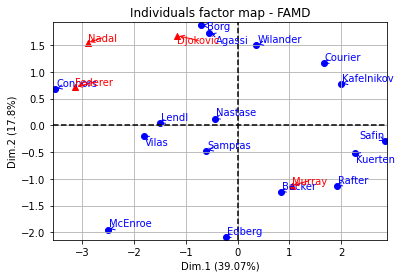

In [7]:
#directement représentation graphique
plotFAMD(afdm,choice='ind',repel=True,ind_sup=True)

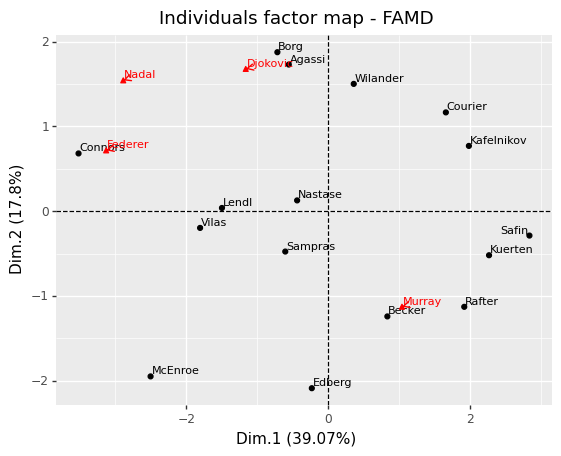

In [8]:
p = fviz_famd_ind(afdm,
                  color="black",
                  repel=True)
print(p)

In [9]:
row["contrib"].head(6)

,Dim.1,Dim.2
Agassi,0.615744,13.128774
Becker,1.395121,6.762551
Borg,1.024529,15.430990
Connors,24.774841,2.035412
Courier,5.510469,5.960298
Edberg,0.105857,19.137974


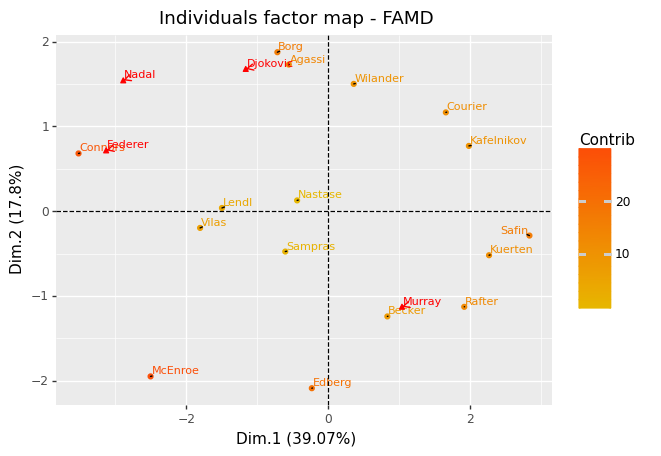

In [10]:
p = fviz_famd_ind(afdm,
                  color="contrib",
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

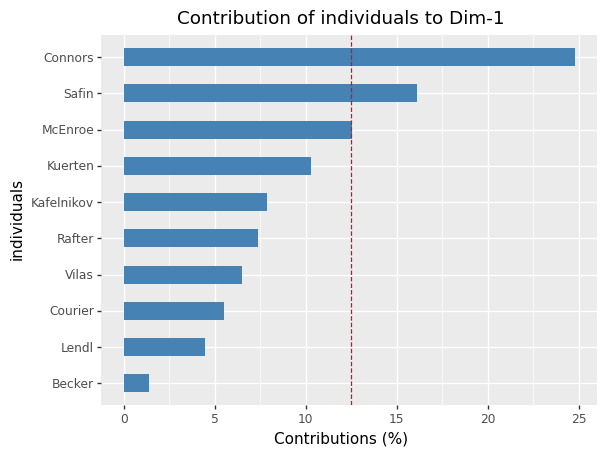

In [11]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(afdm,choice="ind",axis=0,top_contrib=10)
print(p)

In [12]:
row["cos2"].head(6)

,Dim.1,Dim.2
Agassi,0.080645,0.783403
Becker,0.134849,0.297804
Borg,0.087282,0.598936
Connors,0.672505,0.025172
Courier,0.546639,0.269380
Edberg,0.006011,0.495084


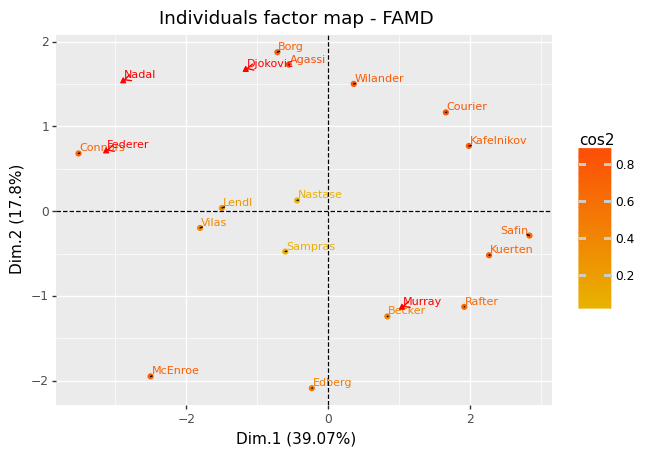

In [13]:
p = fviz_famd_ind(afdm,
                  color="cos2",
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

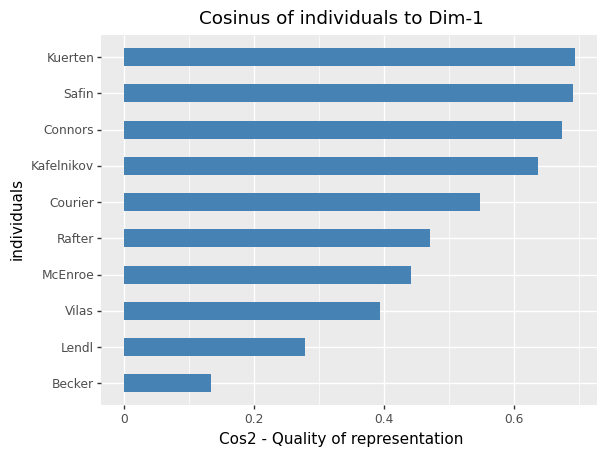

In [14]:
from scientisttools.ggplot import fviz_cosines
p = fviz_cosines(afdm,choice="ind",axis=0)
print(p)

In [15]:
import numpy as np
np.random.seed(123)
my_cont_var = np.random.normal(size=row["coord"].shape[0])
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128]


d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1208: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1212: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


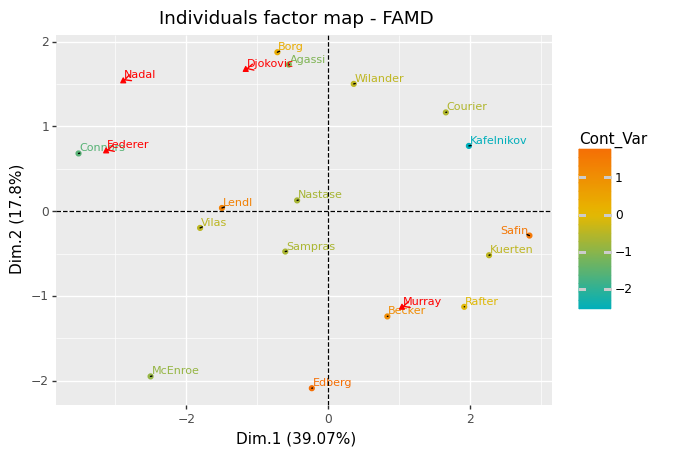

In [16]:
p = fviz_famd_ind(afdm,
                  color=my_cont_var,
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(row["coord"])
kmeans.labels_

array([0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1])

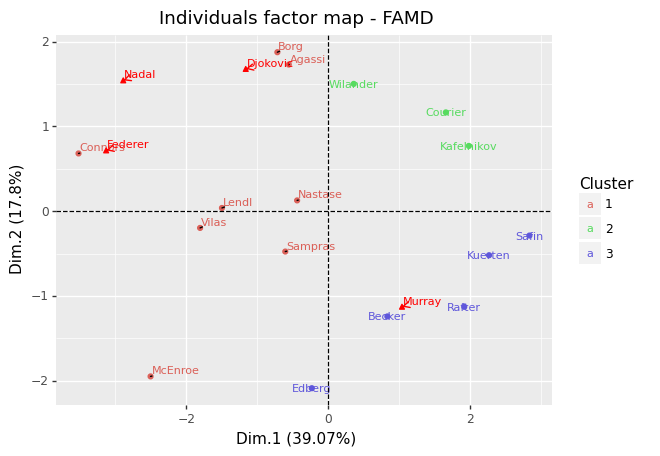

In [18]:
p = fviz_famd_ind(afdm,
                  color=kmeans,
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

## Variables

### Variables quantitatives

In [19]:
from scientisttools.extractfactor import get_famd_col
col = get_famd_col(afdm)
col.keys()

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'ftest', 'quanti_sup'])

In [20]:
col["coord"].head(6)

,Dim.1,Dim.2
Taille,0.762939,-0.339587
Titres,-0.935937,0.074027
Finales,-0.863628,-0.006709
TitresGC,-0.557497,0.181030


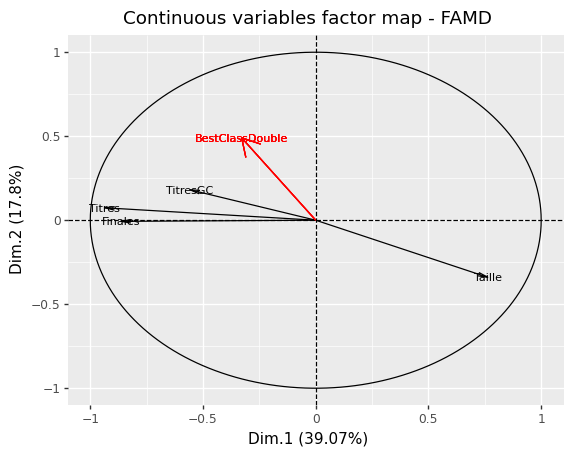

In [21]:
from scientisttools.ggplot import fviz_famd_col
p = fviz_famd_col(afdm,color="black")
print(p)

In [22]:
col["contrib"]

,Dim.1,Dim.2
Taille,18.620702,8.097177
Titres,28.022668,0.384778
Finales,23.859953,0.003161
TitresGC,9.942619,2.301077


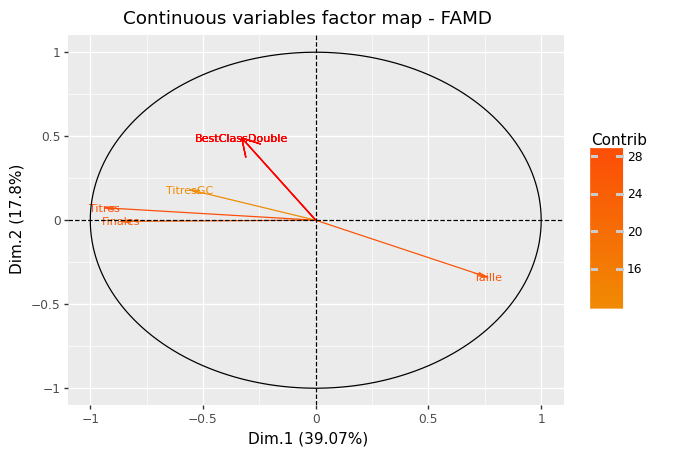

In [23]:
p = fviz_famd_col(afdm,
                  color="contrib")
print(p)

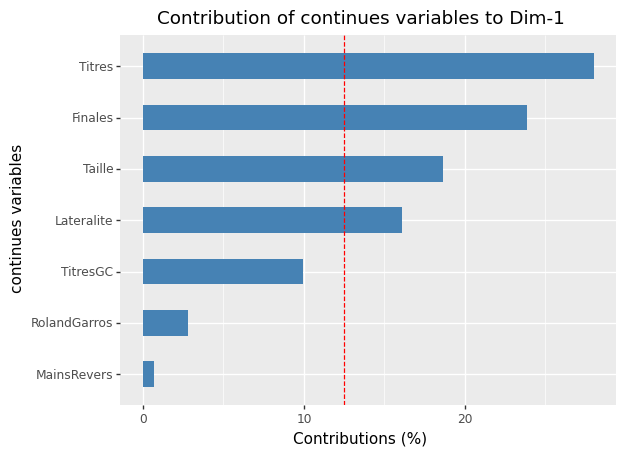

In [24]:
p = fviz_contrib(afdm,choice="var",axis=0)
print(p)

In [25]:
col["cos2"].head(6)

,Dim.1,Dim.2
Taille,0.582077,0.115319
Titres,0.875979,0.005480
Finales,0.745854,0.000045
TitresGC,0.310803,0.032772


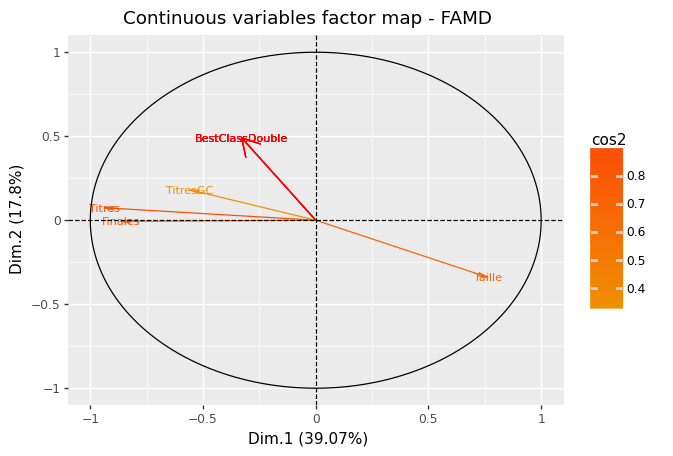

In [26]:
p = fviz_famd_col(afdm,
                  color="cos2")
print(p)

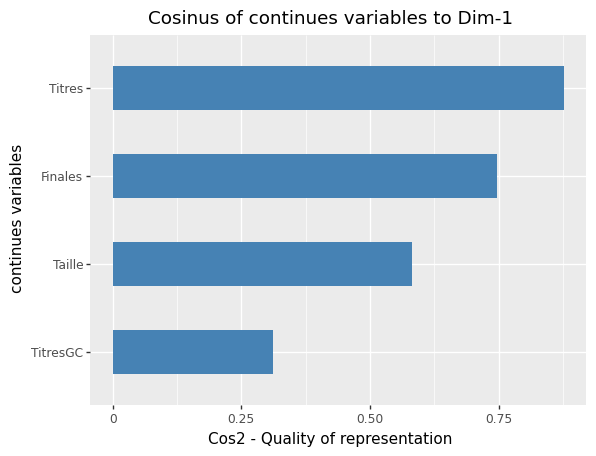

In [27]:
p = fviz_cosines(afdm,choice="var",axis=0)
print(p)

In [28]:
np.random.seed(123)
my_cont_var = np.random.normal(size=col["coord"].shape[0])
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471]


d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1375: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1379: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1388: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


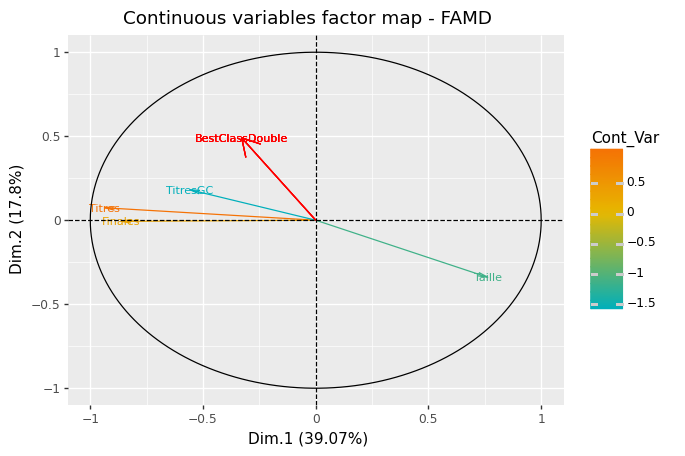

In [29]:
p = fviz_famd_col(afdm,
                  color=my_cont_var)
print(p)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(col["coord"])
kmeans.labels_

array([1, 0, 0, 2])

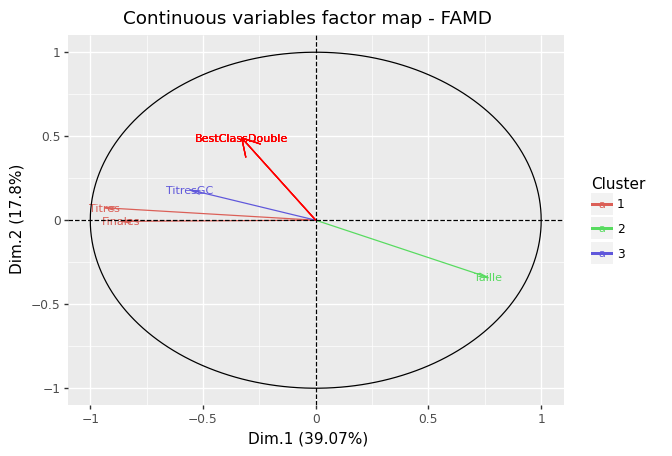

In [31]:
p = fviz_famd_col(afdm,
                  color=kmeans)
print(p)

### Categoricals variables - Modalites

In [32]:
mod = get_famd_mod(afdm)
mod.keys()

dict_keys(['stats', 'coord', 'cos2', 'contrib', 'vtest', 'infos'])

In [33]:
mod["coord"]

,Dim.1,Dim.2
Lateralite_droitier,0.602308,0.112717
Lateralite_gaucher,-2.610001,-0.488441
MainsRevers_deux,0.293516,1.062163
MainsRevers_une,-0.228291,-0.826127
RolandGarros_demi,0.293940,-0.490470
RolandGarros_finale,-1.367098,-2.018646
RolandGarros_vainqueur,0.140499,0.721071


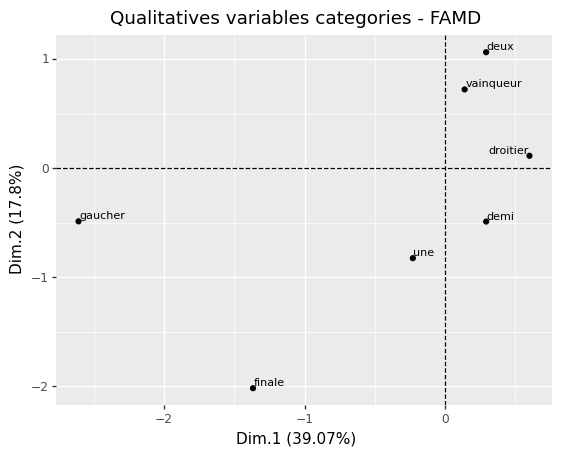

In [34]:
p = fviz_famd_mod(afdm,color="black",repel=True)
print(p)

In [35]:
mod["contrib"]

,Dim.1,Dim.2
Lateralite_droitier,3.016424,0.508939
Lateralite_gaucher,13.071172,2.205404
MainsRevers_deux,0.385722,24.334510
MainsRevers_une,0.300006,18.926841
RolandGarros_demi,0.276312,3.706272
RolandGarros_finale,2.390788,25.112639
RolandGarros_vainqueur,0.113633,14.419200


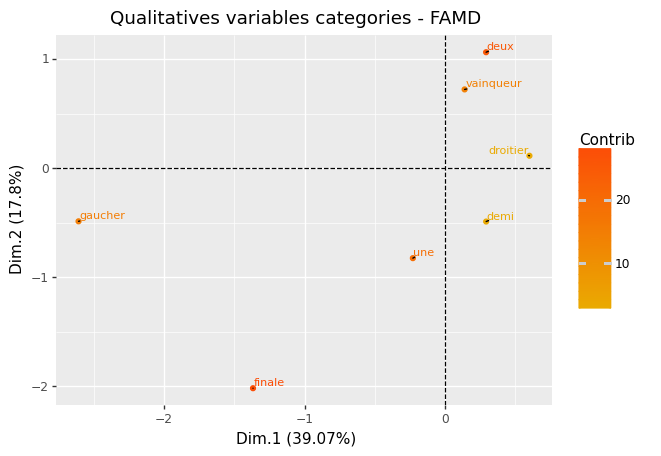

In [36]:
p = fviz_famd_mod(afdm,
                  color="contrib",
                  repel=True)
print(p)

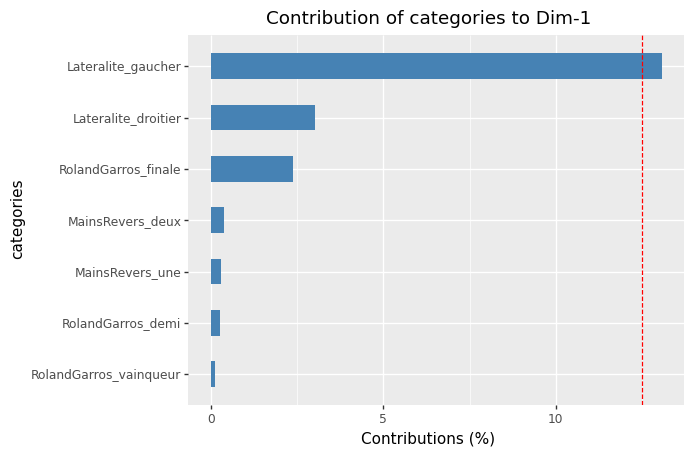

In [37]:
p = fviz_contrib(afdm,choice="mod",axis=0)
print(p)

In [38]:
mod["cos2"]

,Dim.1,Dim.2
Lateralite_droitier,1.572024,0.055056
Lateralite_gaucher,1.572024,0.055056
MainsRevers_deux,0.067007,0.877482
MainsRevers_une,0.067007,0.877482
RolandGarros_demi,0.039273,0.109346
RolandGarros_finale,0.266994,0.582133
RolandGarros_vainqueur,0.025380,0.668499


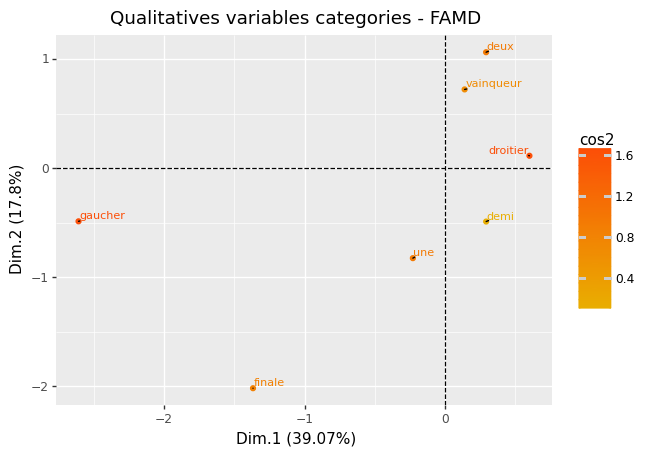

In [39]:
p = fviz_famd_mod(afdm,
                  color="cos2",
                  repel=True)
print(p)

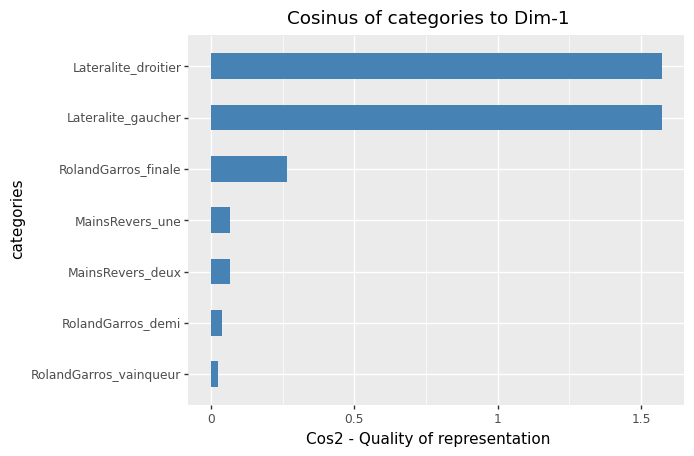

In [40]:
p = fviz_cosines(afdm,choice="mod",axis=0)
print(p)

### Variables - Overall

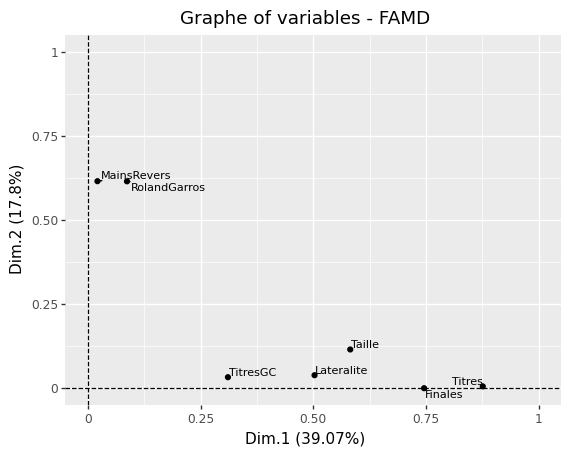

In [41]:
p = fviz_famd_var(afdm,color="black",repel=True)
print(p)

In [42]:
np.random.seed(123)
my_cont_var = np.random.normal(size=7)
my_cont_var

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924])

d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1643: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
d:\Bureau\PythonProject\packages\scientisttools\scientisttools\ggplot.py:1655: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


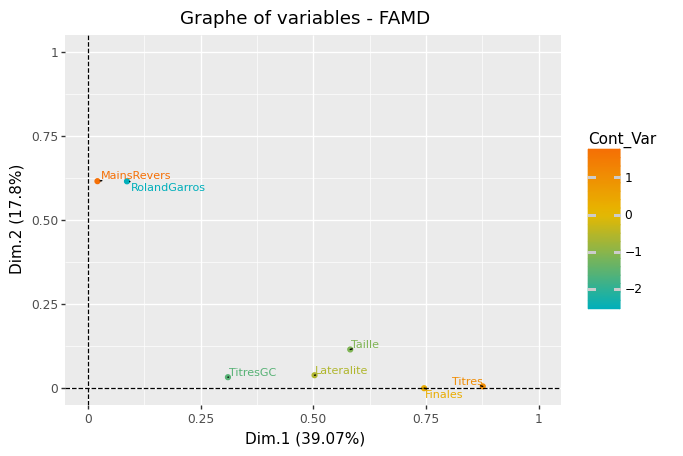

In [43]:
p = fviz_famd_var(afdm,
                  color=my_cont_var,
                  repel=True)
print(p)

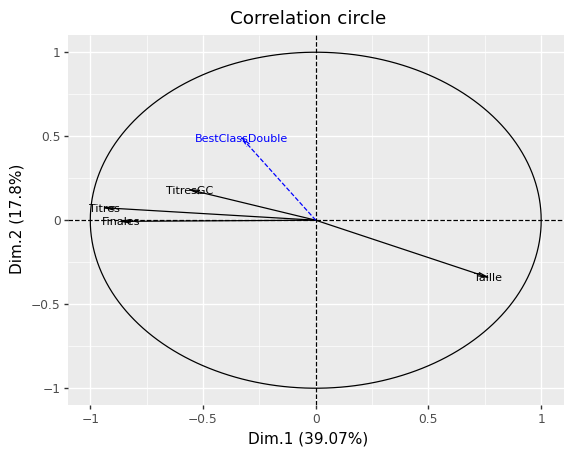

In [44]:
from scientisttools.ggplot import fviz_corrcircle
p = fviz_corrcircle(afdm)
print(p)

In [45]:
from scientisttools.extractfactor import dimdesc
dimdesc(afdm)

NotImplementedError: Error : This method is not yet implemented.